# Identifikasi Ruang Status Sistem LTI Sistem Masa, Pegas, dan Peredam menggunakan optimasi Adams

Dalam makalah ini, kami mengusulkan metode untuk menyelesaikan persamaan model ruang keadaan secara numerik. Selain itu, kami mengusulkan metode identifikasi sistem ruang keadaan baru berdasarkan pemecah ini yang dibuat sebagai grafik TensorFlow. Metode identifikasi mendapatkan error dari fungsi mean squared error loss dan mengoptimalkan nilai state dan matriks input menggunakan pengoptimal Adam.


rumusnya adalah $ \sqrt[n]{arg}	$ aaa.

asdasdasdadasd $ \sqrt[n]{arg}	$ jhshds

# Packages

In [1]:
#needed packages
import datetime
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#importing our packages
from StateSpace import StateSpace
from SysIden import SysIden

Instructions for updating:
non-resource variables are not supported in the long term


# Time

In [2]:
start_time,end_time,dt = 0,100,0.001
Time =  np.arange(start_time,end_time,dt)

# Examples

In those examples, real models are used to generate data to test the identification algorithm on. In real scenarios, this data will come from the system you're interested in (from sensors mainly).

Then, the collected data is used along with the input that was used to generate it. And again in real scenarios, you will have this input available because it is your a signal you choose.

After that, the algorithm runs and the resulted optimized matrices are used to build a state space system that's supposed to behave like the original one.

Finally, a test input signal is used to test the new system behavior and compare it with the original system to show that the identificaiton worked properly.

# Mass, Spring, Damper

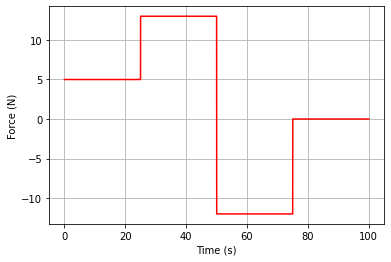

Input Force


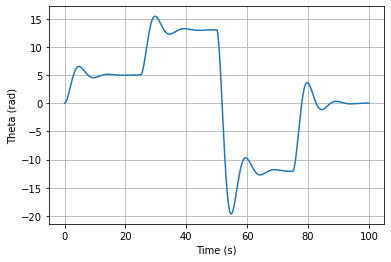

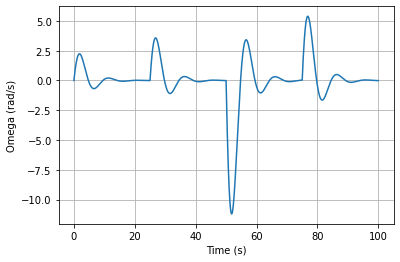

In [9]:
#parameters
k,b,m=1,1,2
j=2

#inputs
temp = int(len(Time)/4)
U =  np.concatenate( (5*np.ones((temp,)),13*np.ones((temp,)),-12*np.ones((temp,)) ,np.zeros((temp,))) )
#U = 10*np.sin(0.05*Time)*np.sin(Time)
U = U.reshape(len(Time), 1 ) 
#plotting input 
plt.plot(Time,U,"r")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.grid(1)
plt.show()
print("Input Force")
#state space matrices
A = np.array([[0,1],[-k/m,-b/m]])
B = np.array([[0],[1/m]])
C = np.eye(2)
D = np.zeros((2,1))

#running the model 
system = signal.lti(A,B,C,D)
_,Y, _ = signal.lsim2(system, U, Time)
#plotting system outputs
labels = ['Theta (rad)','Omega (rad/s)']
for y,label in zip(Y.T,labels):
    plt.plot(Time,y)
    plt.xlabel("Time (s)")
    plt.ylabel(label)
    plt.grid(1)
    plt.show()
#preparing the data for identification Y shape :(len(time) +1<-- for initial conditions,-1) , U shape :(len(time),-1) 
ics = np.zeros((1,Y.shape[-1]))
Y = np.concatenate((ics,Y),axis=0).T
U = U.T

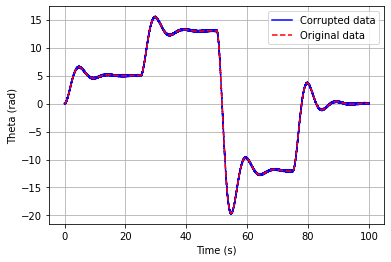

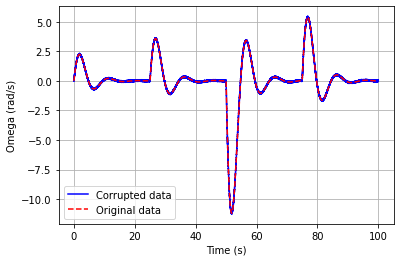

0 : cost = 0.0031699670944363  took:  0:00:12.819589
50 : cost = 0.0031016289722174  took:  0:00:00.336140
100 : cost = 0.0030876987148076  took:  0:00:00.339401
150 : cost = 0.0030875788070261  took:  0:00:00.310761
200 : cost = 0.0030875783413649  took:  0:00:00.301757
250 : cost = 0.0030875783413649  took:  0:00:00.287669
300 : cost = 0.0030875783413649  took:  0:00:00.314677
350 : cost = 0.0030875781085342  took:  0:00:00.292982
400 : cost = 0.0030875783413649  took:  0:00:00.304033
450 : cost = 0.0030875783413649  took:  0:00:00.377292
500 : cost = 0.0030875783413649  took:  0:00:00.287778
550 : cost = 0.0030875781085342  took:  0:00:00.323426
600 : cost = 0.0030875781085342  took:  0:00:00.302970
650 : cost = 0.0030875783413649  took:  0:00:00.286661
700 : cost = 0.0030875781085342  took:  0:00:00.300278
750 : cost = 0.0030875783413649  took:  0:00:00.304887
800 : cost = 0.0030875783413649  took:  0:00:00.303940
850 : cost = 0.0030875781085342  took:  0:00:00.286279
900 : cost = 

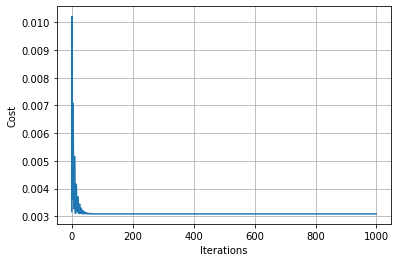

In [6]:
#Optimization Session (You would need to only edit epochs, noise level, Lr)  

iters = 1000
noise_levels = np.array([0.05,0.025]).reshape(2,-1)
lr = 5
noise  = np.random.randn(*Y.shape) * noise_levels
Yn= Y+ noise
for s,s_,label in zip(Y[:,1:],Yn[:,1:],labels):
    plt.plot(Time,s_,'b',label='Corrupted data')
    plt.plot(Time,s,'r--',label='Original data')
    plt.xlabel("Time (s)")
    plt.ylabel(label)
    plt.grid(1)
    plt.legend()
    plt.show()

#build the system identifier object
oshp,ishp = Y.shape[0], U.shape[0]
iden = SysIden(ishp,oshp,dt,lr)

iden.optimize(Yn,U,1000)

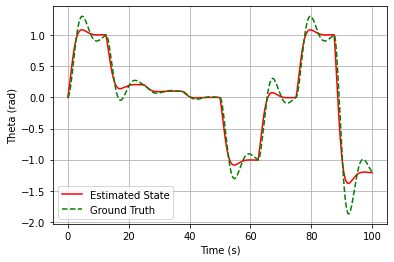

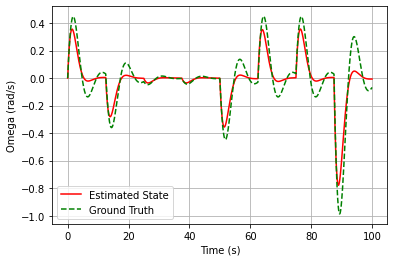

In [8]:
#Results Showing (you would only need to change the input vector)

temp = int(len(Time)/8)
U =  np.concatenate( (np.ones((temp,)),0.2*np.ones((temp,)),0.1*np.ones((temp,)) ,np.zeros((temp,)),-1*np.ones((temp,)),np.zeros((temp,)) ,1*np.ones((temp,)) ,-1.2*np.ones((temp,))) )
#U = 10*np.sin(0.05*Time)*np.sin(Time)
#U = U.reshape(len(Time), 1 ) 

A,B = iden.get_matrices()
C = np.eye(2)
D = np.zeros((2,1))
system1 = signal.lti(A,B,C,D)

_, X_new, _ = signal.lsim2(system1, U, Time)
_, X_old, _ = signal.lsim2(system, U, Time)

ploting1,ploting2 = X_old.T, X_new.T
for q,w,name in zip(ploting1,ploting2,labels):
  plt.plot(Time,w,'r', label='Estimated State')
  plt.plot(Time,q,'g--',label='Ground Truth')
  plt.xlabel("Time (s)")
  plt.ylabel(name)
  plt.legend()
  plt.grid(1)
  plt.show()
#preparing the data for identification Y shape :(len(time) +1<-- for initial conditions,-1) , U shape :(len(time),-1) 
ics = np.zeros((1,Y.shape[-1]))
Y = np.concatenate((ics,Y),axis=0).T
U = U.T